# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, read csv file.
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Load dataset to pandas dataframe

In [2]:
df = pd.read_csv('HIV_dataset.csv')

### View dataframe

In [3]:
df.head(8)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE
7,15,UNMARRIED,NO,Junior High School,YES,NO,Public Bath,Bisexual,NO,POSITIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [5]:
# See if there are any missing values in the dataset
df.isnull().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

In [6]:
df.head(8)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE
7,15,UNMARRIED,NO,Junior High School,YES,NO,Public Bath,Bisexual,NO,POSITIVE


# Analyze dataset

### Plot result collumm 

In [7]:
# normalizing the result column

def normalize_result(x: str):
    if x.lower() == 'positive':
        return "Positive"
    else:
        return 'Negative'
    
df['Result'] = df['Result'].apply(normalize_result)

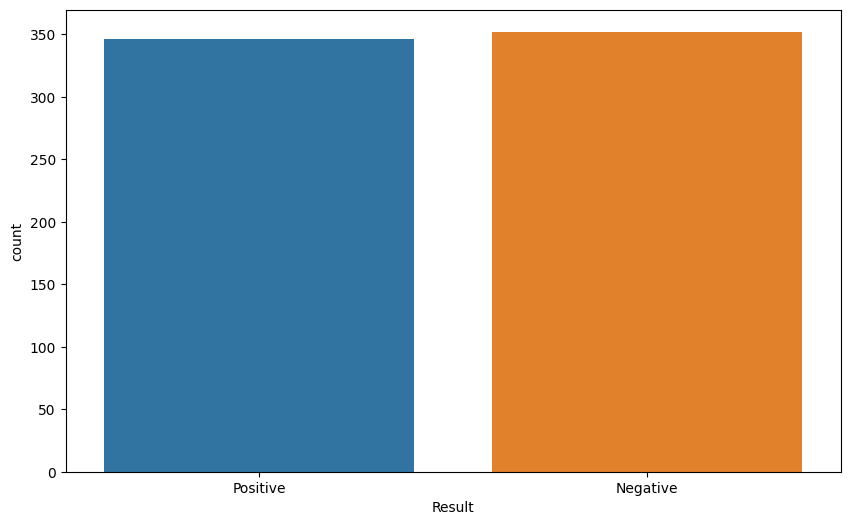

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue="Result")
plt.show()

### Plot how STD effect the result

In [9]:
# normalizing the STD column

def normalize_std(x: str):
    if x.lower() == "yes":
        return "Yes"
    else:
        return "No"
    
df["STD"] = df["STD"].apply(normalize_std)

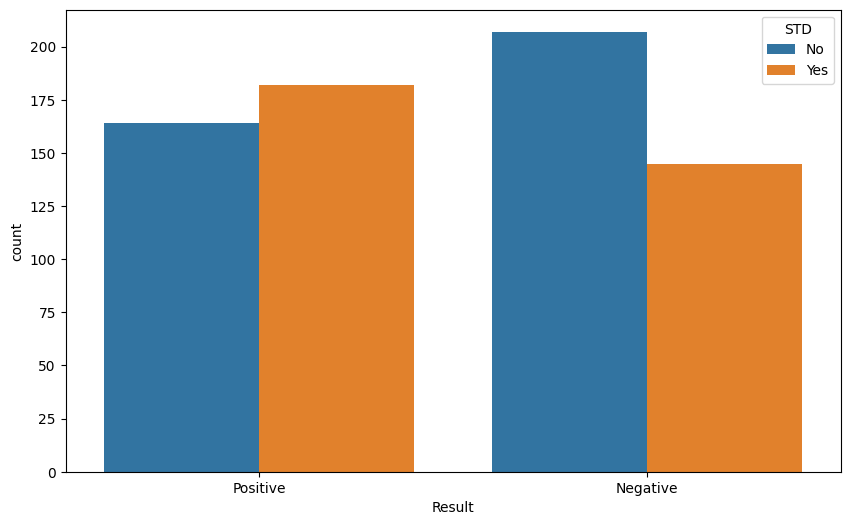

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue="STD")
plt.show()

### Plot how Places of seeking sex partners effect HIV

In [11]:
df['Places of seeking sex partners'].replace(pd.NA,'Others',inplace=True)

C:\Users\emonr\AppData\Local\Temp\ipykernel_2688\2988063103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Places of seeking sex partners'].replace(pd.NA,'Others',inplace=True)


In [12]:
def normalize_spe(x: str):
    if x.lower() == 'bar':
        return 'Bar'
    elif x.lower() == 'park':
        return 'Park'
    elif x.lower() == 'internet':
        return 'Internet'
    elif x.lower() == 'public bath':   
        return 'Public Bath'
    else:
        return 'Others'
    
df["Places of seeking sex partners"] = df["Places of seeking sex partners"].apply(normalize_spe)

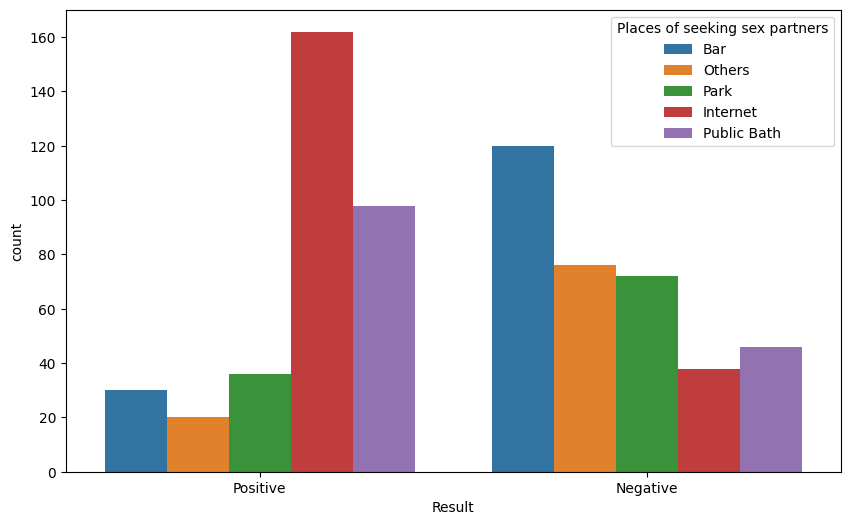

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='Places of seeking sex partners')
plt.show()

### Plot sexual orientation effecting result

In [14]:
def normalize_ori(x: str):
    if x.lower() == "bisexual":
        return "Bisexual"
    elif x.lower() == "hetersexual":
        return "Heterosexual"
    else:
        return x
    
df["SEXUAL ORIENTATION"] = df["SEXUAL ORIENTATION"].apply(normalize_ori)

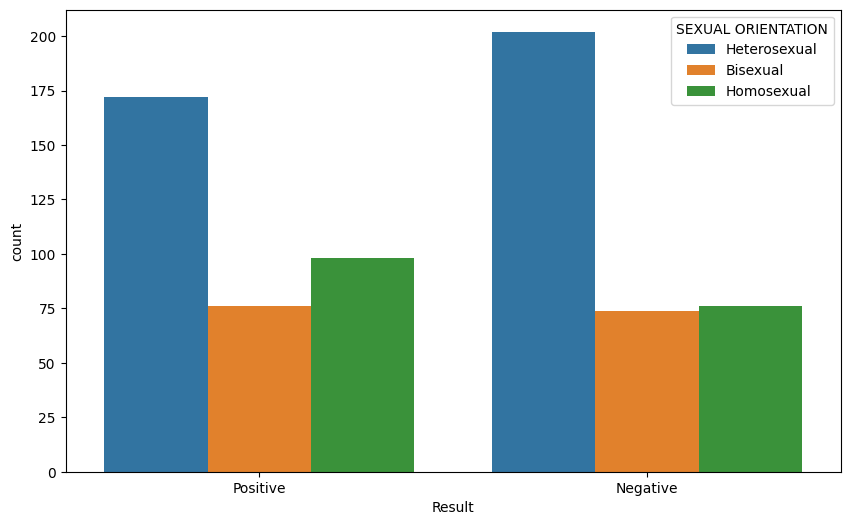

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='SEXUAL ORIENTATION')
plt.show()

### Plot Aids education

In [16]:
def normalize_aidedu(text: str):
    if text.lower() == "yes":
        return "Yes"
    else:
        return "No"

df["AIDS education"] = df["AIDS education"].apply(normalize_aidedu)

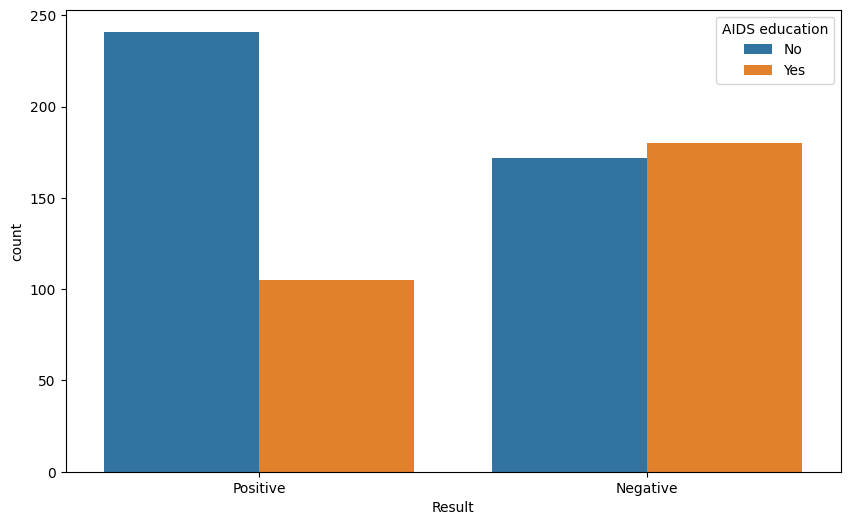

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='AIDS education')
plt.show()

### Education level effect on result

In [18]:
df["Educational Background"].unique()

array(['College Degree', 'Senior High School', 'Junior High School',
       'Illiteracy', 'Primary School', 'College Dregree'], dtype=object)

In [19]:
df["Educational Background"].replace('College Dregree','College Degree',inplace=True)

C:\Users\emonr\AppData\Local\Temp\ipykernel_2688\4056992011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Educational Background"].replace('College Dregree','College Degree',inplace=True)


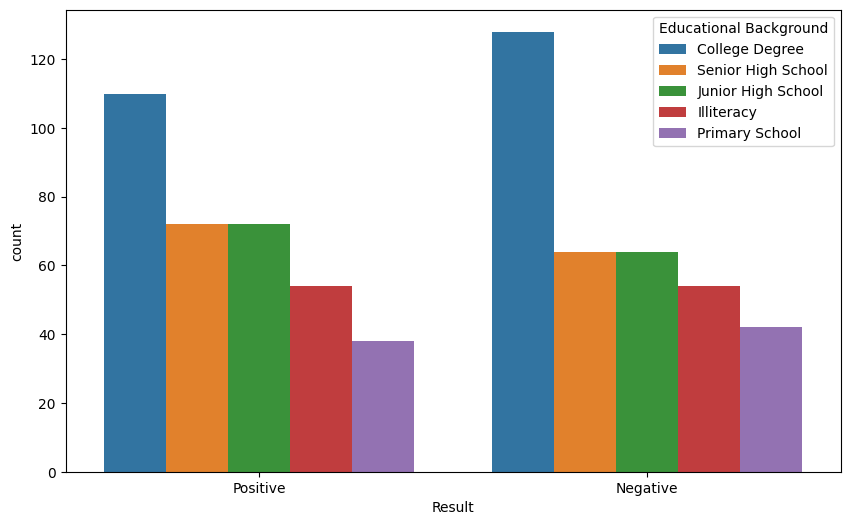

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Result',hue='Educational Background')
plt.show()

### Drag Taking

In [21]:
df['Drug- taking'].unique()

array(['YES', 'NO', 'No', 'Yes'], dtype=object)

In [22]:
def norm_drag(x:str):
    if x.lower() == 'yes':
        return 'Yes'
    else:
        return 'No'
    
df['Drug- taking'] = df['Drug- taking'].apply(norm_drag)

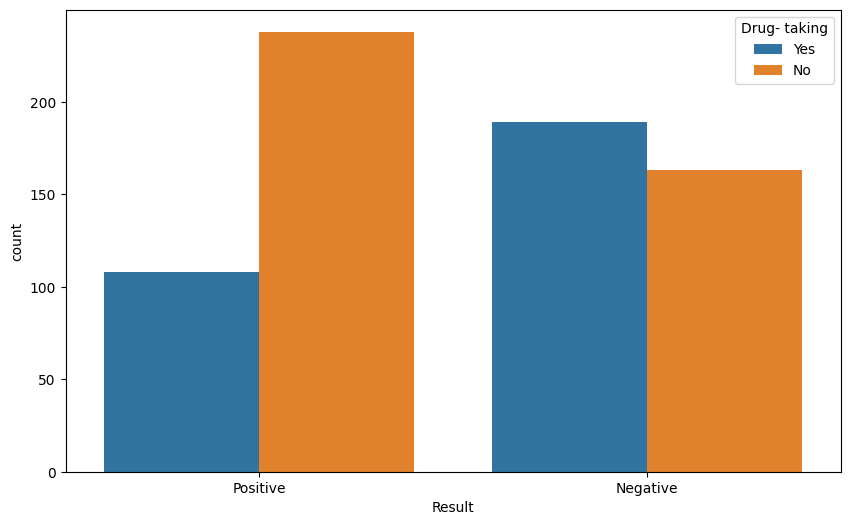

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Result',hue='Drug- taking')
plt.show()

### Past Hiv test

In [24]:
def norm_test(x: str):
    if x.lower() == "yes":
        return "Yes"
    else:
        return "No"
    
df['HIV TEST IN PAST YEAR'] = df['HIV TEST IN PAST YEAR'].apply(norm_test)

In [25]:
df['HIV TEST IN PAST YEAR'].unique()

array(['Yes', 'No'], dtype=object)

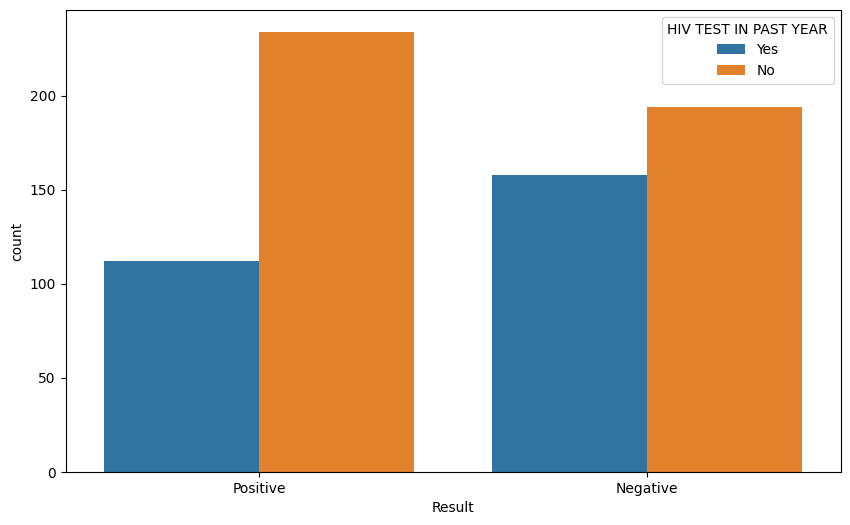

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Result',hue='HIV TEST IN PAST YEAR')
plt.show()

# Model Tarining

## Data Preprocesing 

### Spliting feature into numetical and categorical

In [27]:
numerical_fetrs =list(df.select_dtypes(np.number))
category_fetrs = list(df.select_dtypes('object'))

category_fetrs.remove('Result')

In [28]:
print(numerical_fetrs)
print(category_fetrs)

['Age']
['Marital Staus', 'STD', 'Educational Background', 'HIV TEST IN PAST YEAR', 'AIDS education', 'Places of seeking sex partners', 'SEXUAL ORIENTATION', 'Drug- taking']


### Making Pipline

In [29]:
# importing the necessary libraries for the model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [30]:
X = df.drop('Result', axis=1)
y = df['Result']

In [31]:
X.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking
0,22,UNMARRIED,No,College Degree,Yes,No,Bar,Heterosexual,Yes
1,20,UNMARRIED,No,College Degree,No,Yes,Others,Heterosexual,No
2,23,Married,Yes,College Degree,No,Yes,Others,Bisexual,No
3,24,Married,No,College Degree,Yes,Yes,Park,Heterosexual,Yes
4,18,UNMARRIED,Yes,Senior High School,Yes,No,Internet,Heterosexual,Yes


In [32]:
y.head()

0    Positive
1    Negative
2    Negative
3    Positive
4    Positive
Name: Result, dtype: object

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [34]:
y_test

158    Positive
499    Negative
396    Negative
155    Negative
321    Negative
         ...   
24     Positive
218    Positive
431    Negative
281    Negative
110    Positive
Name: Result, Length: 140, dtype: object

In [35]:
numeric_processor = Pipeline([('scaler', StandardScaler())])

In [36]:
numeric_processor

Pipeline(steps=[('scaler', StandardScaler())])

In [37]:
category_processor = Pipeline([('encoder',OneHotEncoder(handle_unknown='ignore'))])

In [38]:
category_processor

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [39]:
processor = ColumnTransformer([('numeric',numeric_processor,numerical_fetrs),('category',category_processor,category_fetrs)])

In [40]:
processor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age']),
                                ('category',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Marital Staus', 'STD',
                                  'Educational Background',
                                  'HIV TEST IN PAST YEAR', 'AIDS education',
                                  'Places of seeking sex partners',
                                  'SEXUAL ORIENTATION', 'Drug- taking'])])

In [41]:
final_pipline = make_pipeline(processor, RandomForestClassifier())

In [42]:
final_pipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('category',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marital Staus', 'STD',
                                                   'Educational Background',
                                                   'HIV TEST IN PAST YEAR',
                                                   'AIDS education',
                                                   'Places of seeking sex '
                                                   'partners',
                                                   'SEXUAL ORIENTATION',
                                                   'Drug- taking'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## Model Train

In [43]:
final_pipline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('category',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marital Staus', 'STD',
                                                   'Educational Background',
                                                   'HIV TEST IN PAST YEAR',
                                                   'AIDS education',
                                                   'Places of seeking sex '
                                                   'partners',
                                                   'SEXUAL ORIENTATION',
                                                   'Drug- taking'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [44]:
final_pipline.predict(X_test)

array(['Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positi

In [45]:
final_pipline.score(X_test,y_test)

0.9785714285714285

In [46]:
processor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age']),
                                ('category',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Marital Staus', 'STD',
                                  'Educational Background',
                                  'HIV TEST IN PAST YEAR', 'AIDS education',
                                  'Places of seeking sex partners',
                                  'SEXUAL ORIENTATION', 'Drug- taking'])])

In [47]:
pred = pd.read_csv('Book1.csv')

In [48]:
p1 = processor.transform(pred)

In [49]:
rc = RandomForestClassifier()
rc.fit(processor.transform(X_train),y_train)

RandomForestClassifier()

In [50]:
rc.predict(p1)

array(['Negative'], dtype=object)